xAPI-Edu-Data.csv - https://www.kaggle.com/aljarah/xAPI-Edu-Data

# Attributes:

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

# Target

The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

# Importing File and Libraries

In [2]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv
User uploaded file "xAPI-Edu-Data.csv" with length 38026 bytes


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
fname = "xAPI-Edu-Data.csv"
df = pd.read_csv(fname)

# Data Analysis

In [5]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
print(df.columns)    

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [8]:
df.isnull().sum().sum() # Null Value Check

0

No NULL Value in dataset

# Visualization

## 3D plot based on Class, Nationality and Grade of an student based on gender

In [9]:
#3D view based of students based on class, Nationality, grade and colour is gender
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(df, x='NationalITy', y='Class', z='GradeID', color='gender')
fig.show()

<Figure size 720x216 with 0 Axes>

## Target - Distribution

Class is divided in H, M and L.
Low-Level(L): interval includes values from 0 to 69,

Middle-Level(M): interval includes values from 70 to 89,

High-Level(H): interval includes values from 90-100.

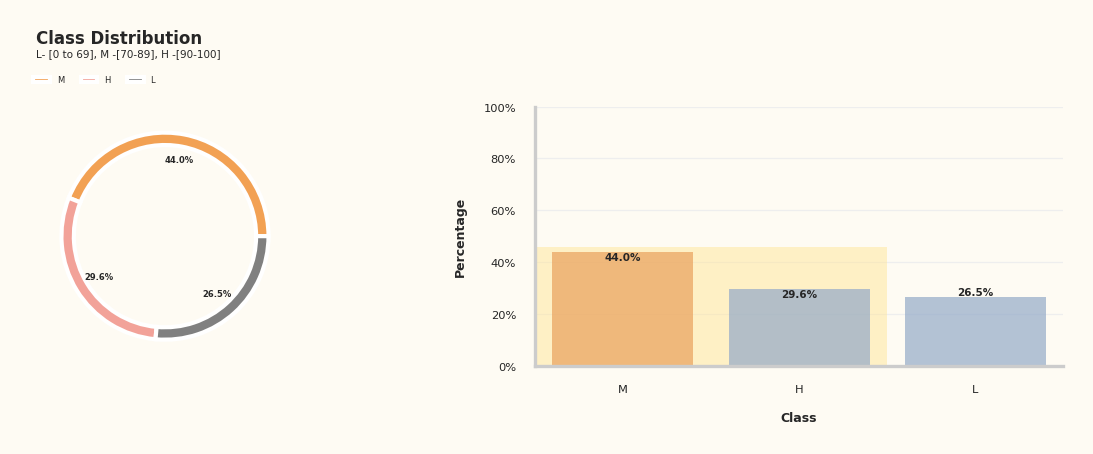

In [10]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
#Pie
temp = pd.DataFrame(df.groupby('Class', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[(temp.answer=='M') | (temp.answer=='H') | (temp.answer=='L')]
temp = temp.groupby('answer').sum().reset_index()
temp = temp.sort_values('amount', ascending=False)
color_map = ['#F2A154', '#F2A299', 'gray']
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#FEFBF3")

#graph
ax0.pie(x=temp['amount'], wedgeprops=dict(width=0.12), colors=color_map, pctdistance=0.75,
        textprops={'fontsize': 2, 'weight': 'semibold'}, autopct='%1.1f%%')

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*1.60, 'Class Distribution', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1*1.45, 'L- [0 to 69], M -[70-89], H -[90-100]', fontsize=2.5, ha='left', va='top')
ax0.legend(temp['answer'], loc="upper left", bbox_to_anchor=(x0*0.03, y1*0.92), prop={'size': 2}, frameon=False, ncol=3)

#format tick
ax0.tick_params(labelsize=3, width=0.5, length=1.5)

#Bar
temp = pd.DataFrame(df.groupby('Class', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 5))
ax0.set(ylim=(0, 100))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=.9, alpha=0.7)
fillwidth = np.array([-0.5,1.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.75, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()


Only 29.6% of student belongs to High level.
44% of student belongs to Mid Level and 26.5% belong to low level.

## Gender Distribution

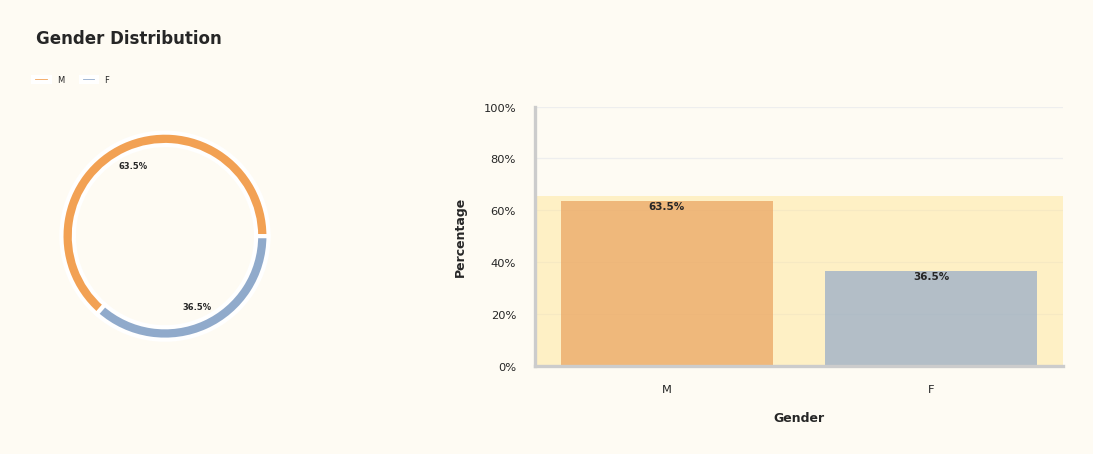

In [11]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)

#Pie
temp = pd.DataFrame(df.groupby('gender', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[(temp.answer=='M') | (temp.answer=='F') ]
temp = temp.groupby('answer').sum().reset_index()
temp = temp.sort_values('amount', ascending=False)
color_map = ['#F2A154', '#90AACB']
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#FEFBF3")

#graph
ax0.pie(x=temp['amount'], wedgeprops=dict(width=0.12), colors=color_map, pctdistance=0.75,
        textprops={'fontsize': 2, 'weight': 'semibold'}, autopct='%1.1f%%')

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*1.60, 'Gender Distribution', fontsize=4, ha='left', va='top', weight='bold')
ax0.legend(temp['answer'], loc="upper left", bbox_to_anchor=(x0*0.03, y1*0.92), prop={'size': 2}, frameon=False, ncol=3)

#format tick
ax0.tick_params(labelsize=3, width=0.5, length=1.5)

#Bar
temp = pd.DataFrame(df.groupby('gender', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
#temp = temp.drop(4)
temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 5))
ax0.set(ylim=(0, 100))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=.9, alpha=0.7)
fillwidth = np.array([-0.5,1.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Gender",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.75, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

63.5% of total students are male student and 36.5% of students are female student.

### Class wrt Gender

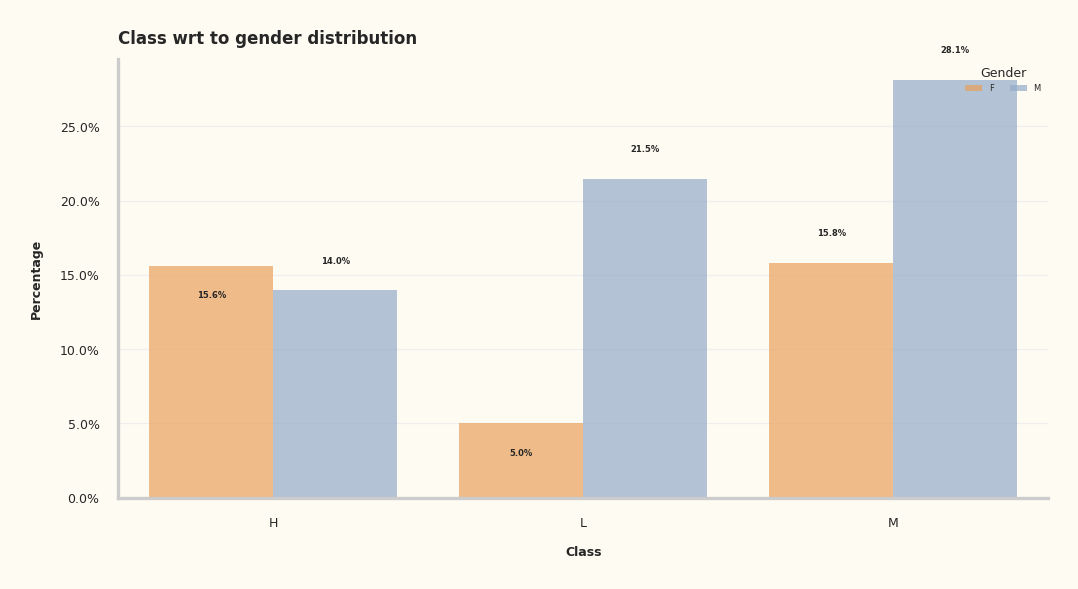

In [12]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "gender"], dropna=False).size())
temp = temp.query("gender=='M' | gender=='F'")
temp = temp.reset_index()
temp.columns = ['Class', 'gender', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['gender'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to gender distribution', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='Gender')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

15.6% of total students are female students who belong to high level.
14% of total sudents are male students who belong to high level.

Those who are in low-level are mainly male students and it belong to 21.5% of total student and only 5% of total students in low level are few students.

**Only 5% of female students belong to low level. So female students performance is better than male students.**

## Class wrt Relation With which Parent

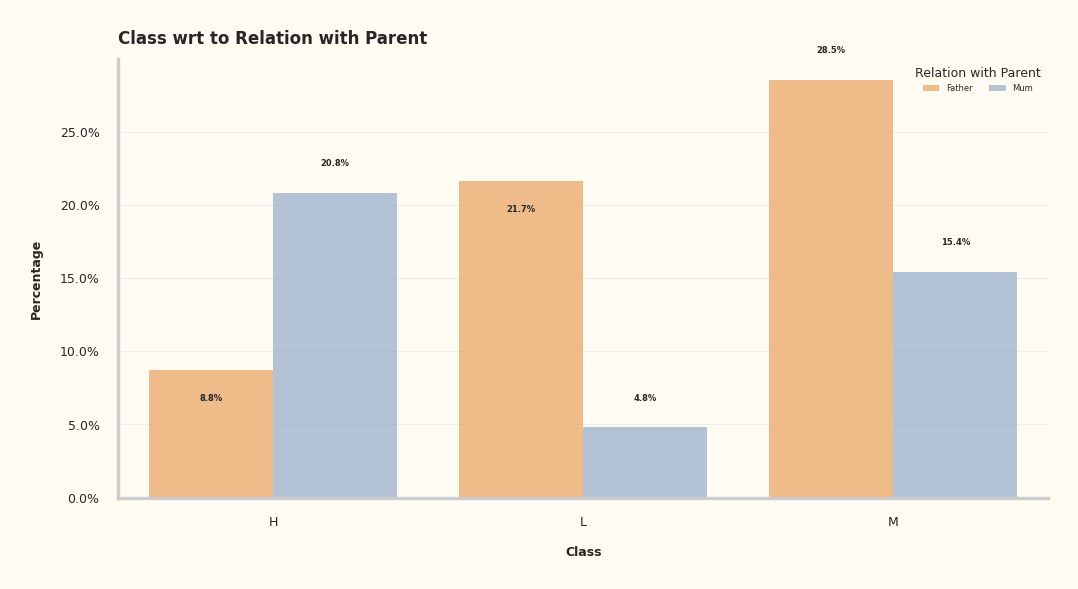

In [13]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "Relation"], dropna=False).size())
temp = temp.query("Relation=='Father' | Relation=='Mum'")
temp = temp.reset_index()
temp.columns = ['Class', 'Relation', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['Relation'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to Relation with Parent', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='Relation with Parent')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

20.8% of total students in high grade have there relation with mum and 21.7% of low grade students have relation with Father.

From this visualization student who have relation will mom are either in H or M, only 4.8% belong to L.

## Class wrt to ParentschoolSatisfaction 

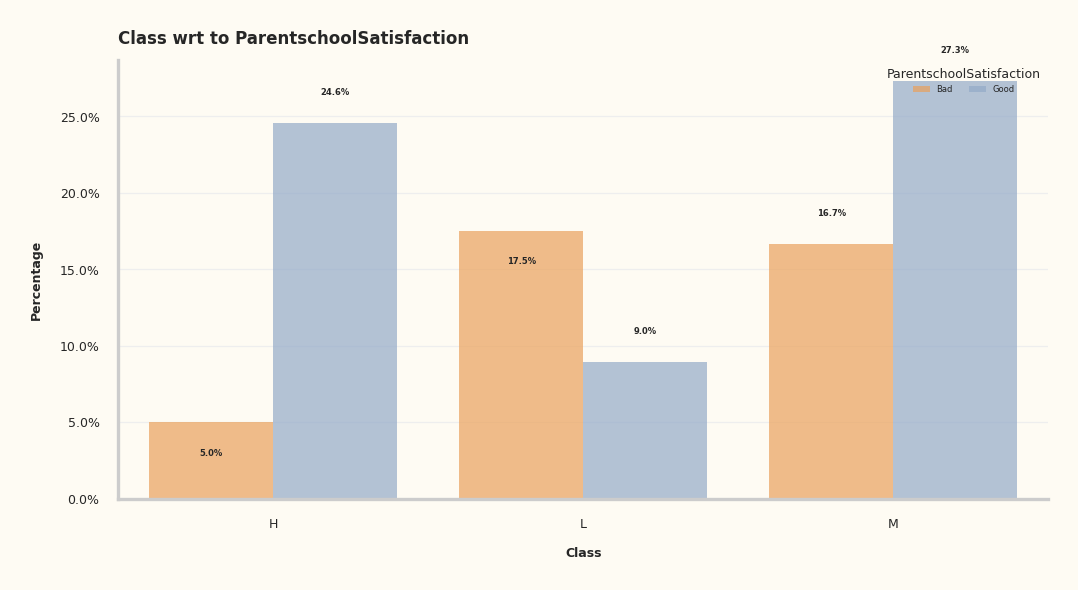

In [14]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "ParentschoolSatisfaction"], dropna=False).size())
temp = temp.query("ParentschoolSatisfaction=='Good' | ParentschoolSatisfaction=='Bad'")
temp = temp.reset_index()
temp.columns = ['Class', 'ParentschoolSatisfaction', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['ParentschoolSatisfaction'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to ParentschoolSatisfaction', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='ParentschoolSatisfaction')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

From this visualization Majority of students parent having statisfaction with school are having good grade.

## Class wrt to ParentAnsweringSurvey 

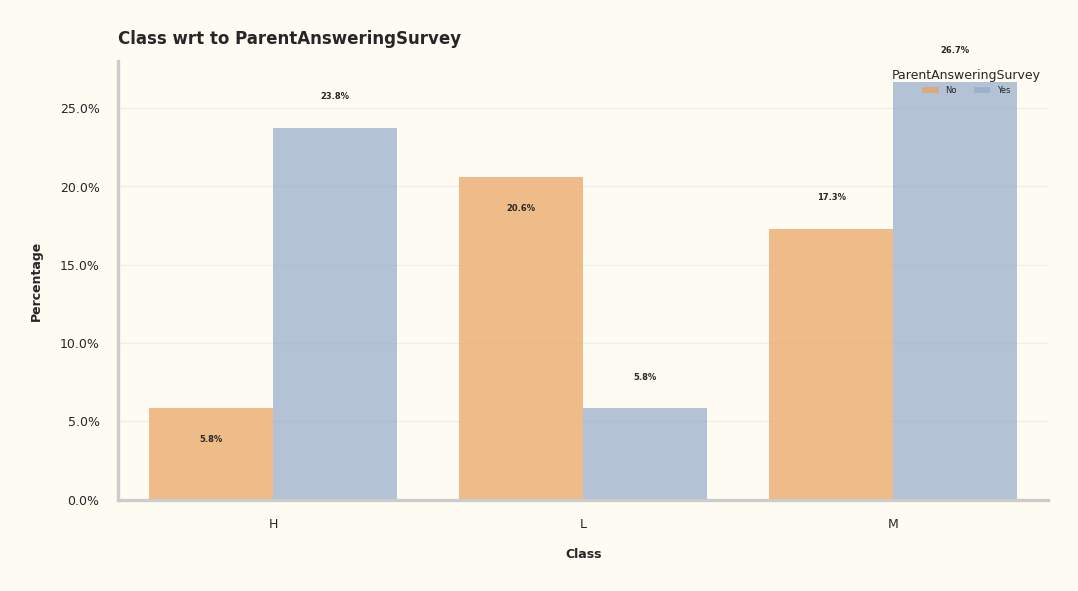

In [15]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "ParentAnsweringSurvey"], dropna=False).size())
temp = temp.query("ParentAnsweringSurvey=='Yes' | ParentAnsweringSurvey=='No'")
temp = temp.reset_index()
temp.columns = ['Class', 'ParentAnsweringSurvey', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['ParentAnsweringSurvey'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to ParentAnsweringSurvey', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='ParentAnsweringSurvey')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

Majority of students Parents answering survey belong to M or H class.

## Class wrt StudentAbsenceDays

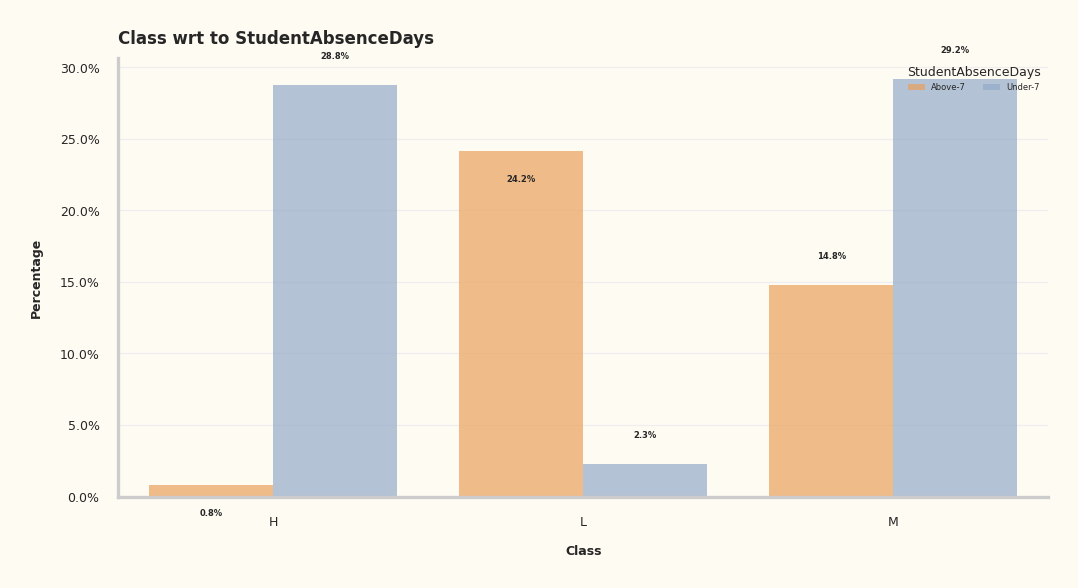

In [16]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "StudentAbsenceDays"], dropna=False).size())
temp = temp.query("StudentAbsenceDays=='Under-7' | StudentAbsenceDays=='Above-7'")
temp = temp.reset_index()
temp.columns = ['Class', 'StudentAbsenceDays', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['StudentAbsenceDays'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to StudentAbsenceDays', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='StudentAbsenceDays')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

Majority of students who are absent more than 7 days are having low grade

##Class wrt Section ID

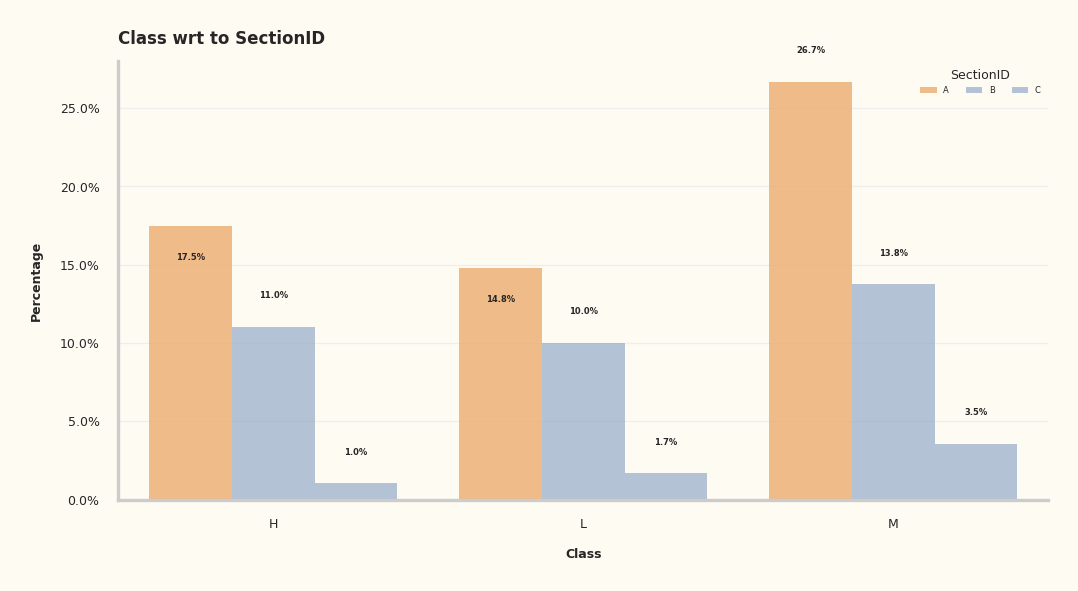

In [17]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "SectionID"], dropna=False).size())
temp = temp.query("SectionID=='A' | SectionID=='B'| SectionID=='C'")
temp = temp.reset_index()
temp.columns = ['Class', 'SectionID', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['SectionID'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to SectionID', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='SectionID')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)


y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

No genric pattern

## Place of Birth

### World Cloud for Place Of Birth

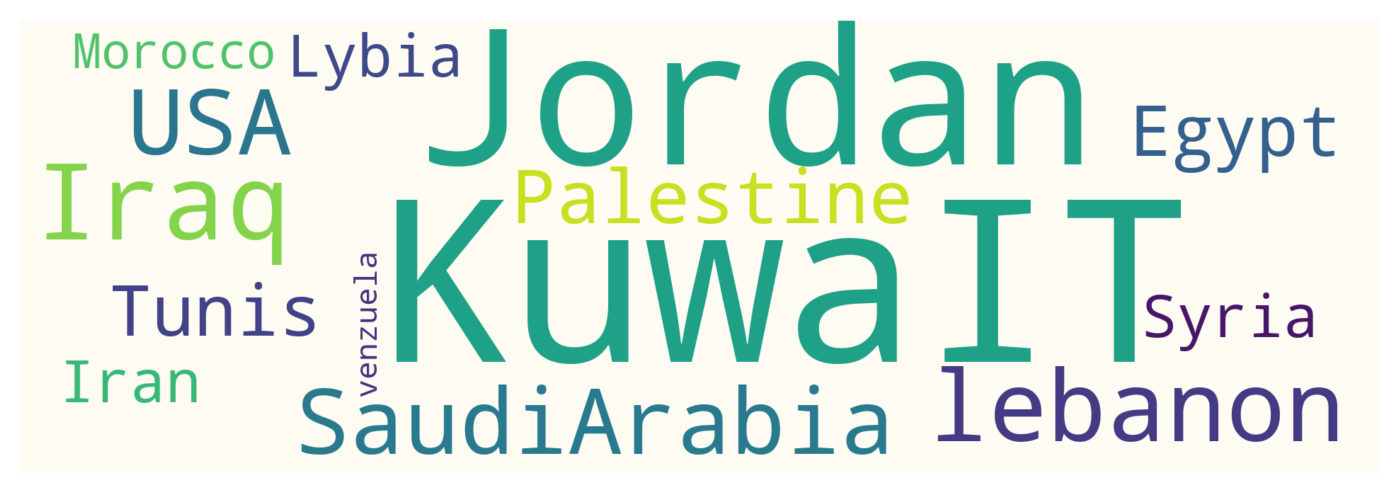

In [18]:
temp = pd.DataFrame(df['PlaceofBirth'])
temp = temp.drop(0)
temp.columns = ['country']
countries = temp['country'].apply(lambda x: 0 if pd.isnull(x) else x)
text1 = " ".join(country for country in countries.astype(str))

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(stopwords = stopwords, collocations = False, background_color = '#FEFBF3',
                        width = 1920, height = 640).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(9, 3))
plt.tight_layout(pad=0)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Majority of Students enrollment are from Kuwait and Jordan

### Distribution percentage for Place of Birth

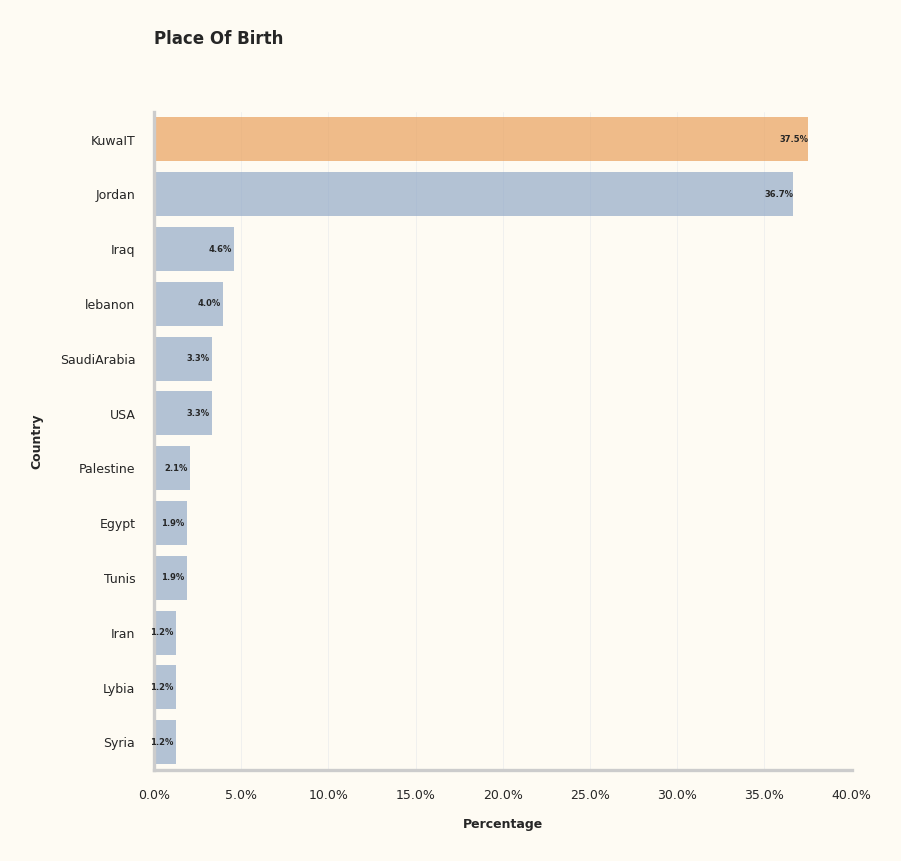

In [19]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 9), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########COUNTRY##########
temp = pd.DataFrame(df.groupby('PlaceofBirth', dropna=False).size()).reset_index()
temp.columns = ['country', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.query("amount>1")


temp = temp.groupby('country').sum()
temp = temp.query("pct>1")
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp[0:20]

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(20)]
color_map[0] = "#F2A154" #F2A154 79B4B7
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 20))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['country'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Country",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.5, 'Place Of Birth', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<14:
        x1 = -.8
    else:
        x1 = .6
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

74.2% of Students enrollments are from Kuwait and Jordan. Although most of the students come from middle east countries, interestingly there are some enrollments from the united states.

## GradeID

Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

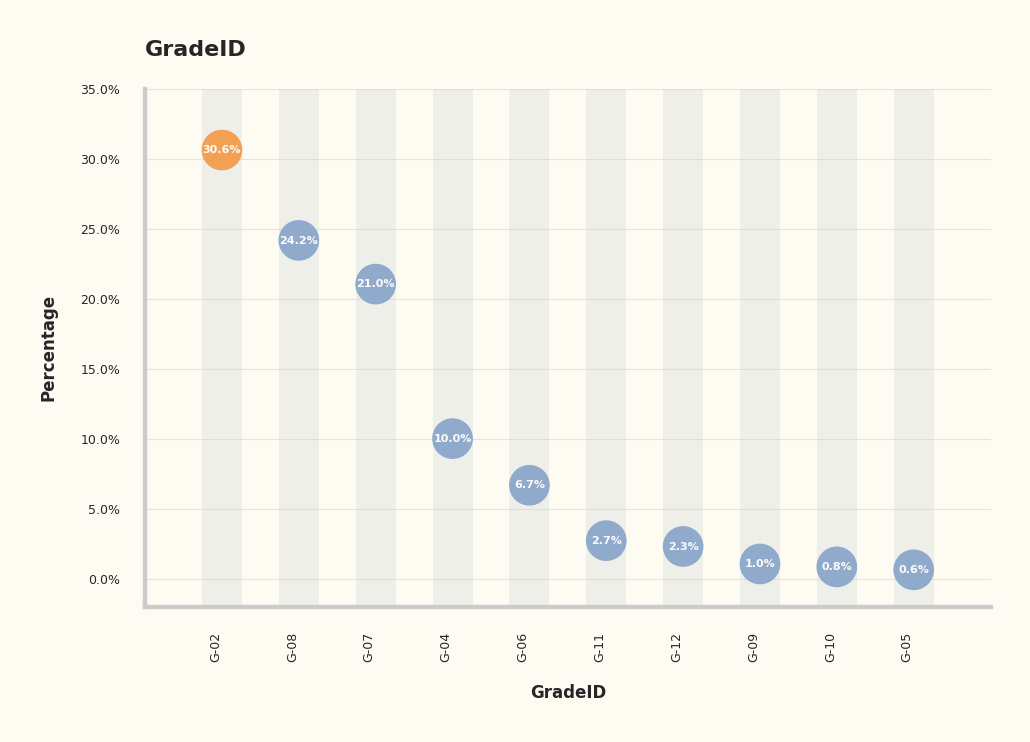

In [20]:
temp = pd.DataFrame(df.groupby('GradeID', dropna=False).size()).reset_index()
temp.columns = ['GradeID', 'amount']
temp = temp.query("amount>1")
temp = temp.query("GradeID!='Other'")
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.drop('index', axis=1)

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(10)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set(xlim=(-1, 10))
ax0.set(ylim=(-2, 35))
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0.scatter(x=temp['GradeID'], y=temp['pct'], s=40, color=color_map, zorder=3)
ax0.grid(which='major', axis='x', zorder=0, color='#E8EAE6', linewidth=7.2, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)

#data label
y = temp['pct']
z = temp['GradeID']
n = temp['pct']
for i, txt in enumerate(n):
    txt = f'{y[i]:.1f}%'
    ax0.annotate(txt, (z[i], y[i]), ha='center', va='center', fontsize=2, weight='semibold', color="#FBFBFB")

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

#format axis
ax0.set_xlabel("GradeID",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.25, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=90, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+3.5, 'GradeID', fontsize=4, ha='left', va='top', weight='bold')


plt.show()


30.6% of student belong to grade level 02.

### Grade Level with respect to Class

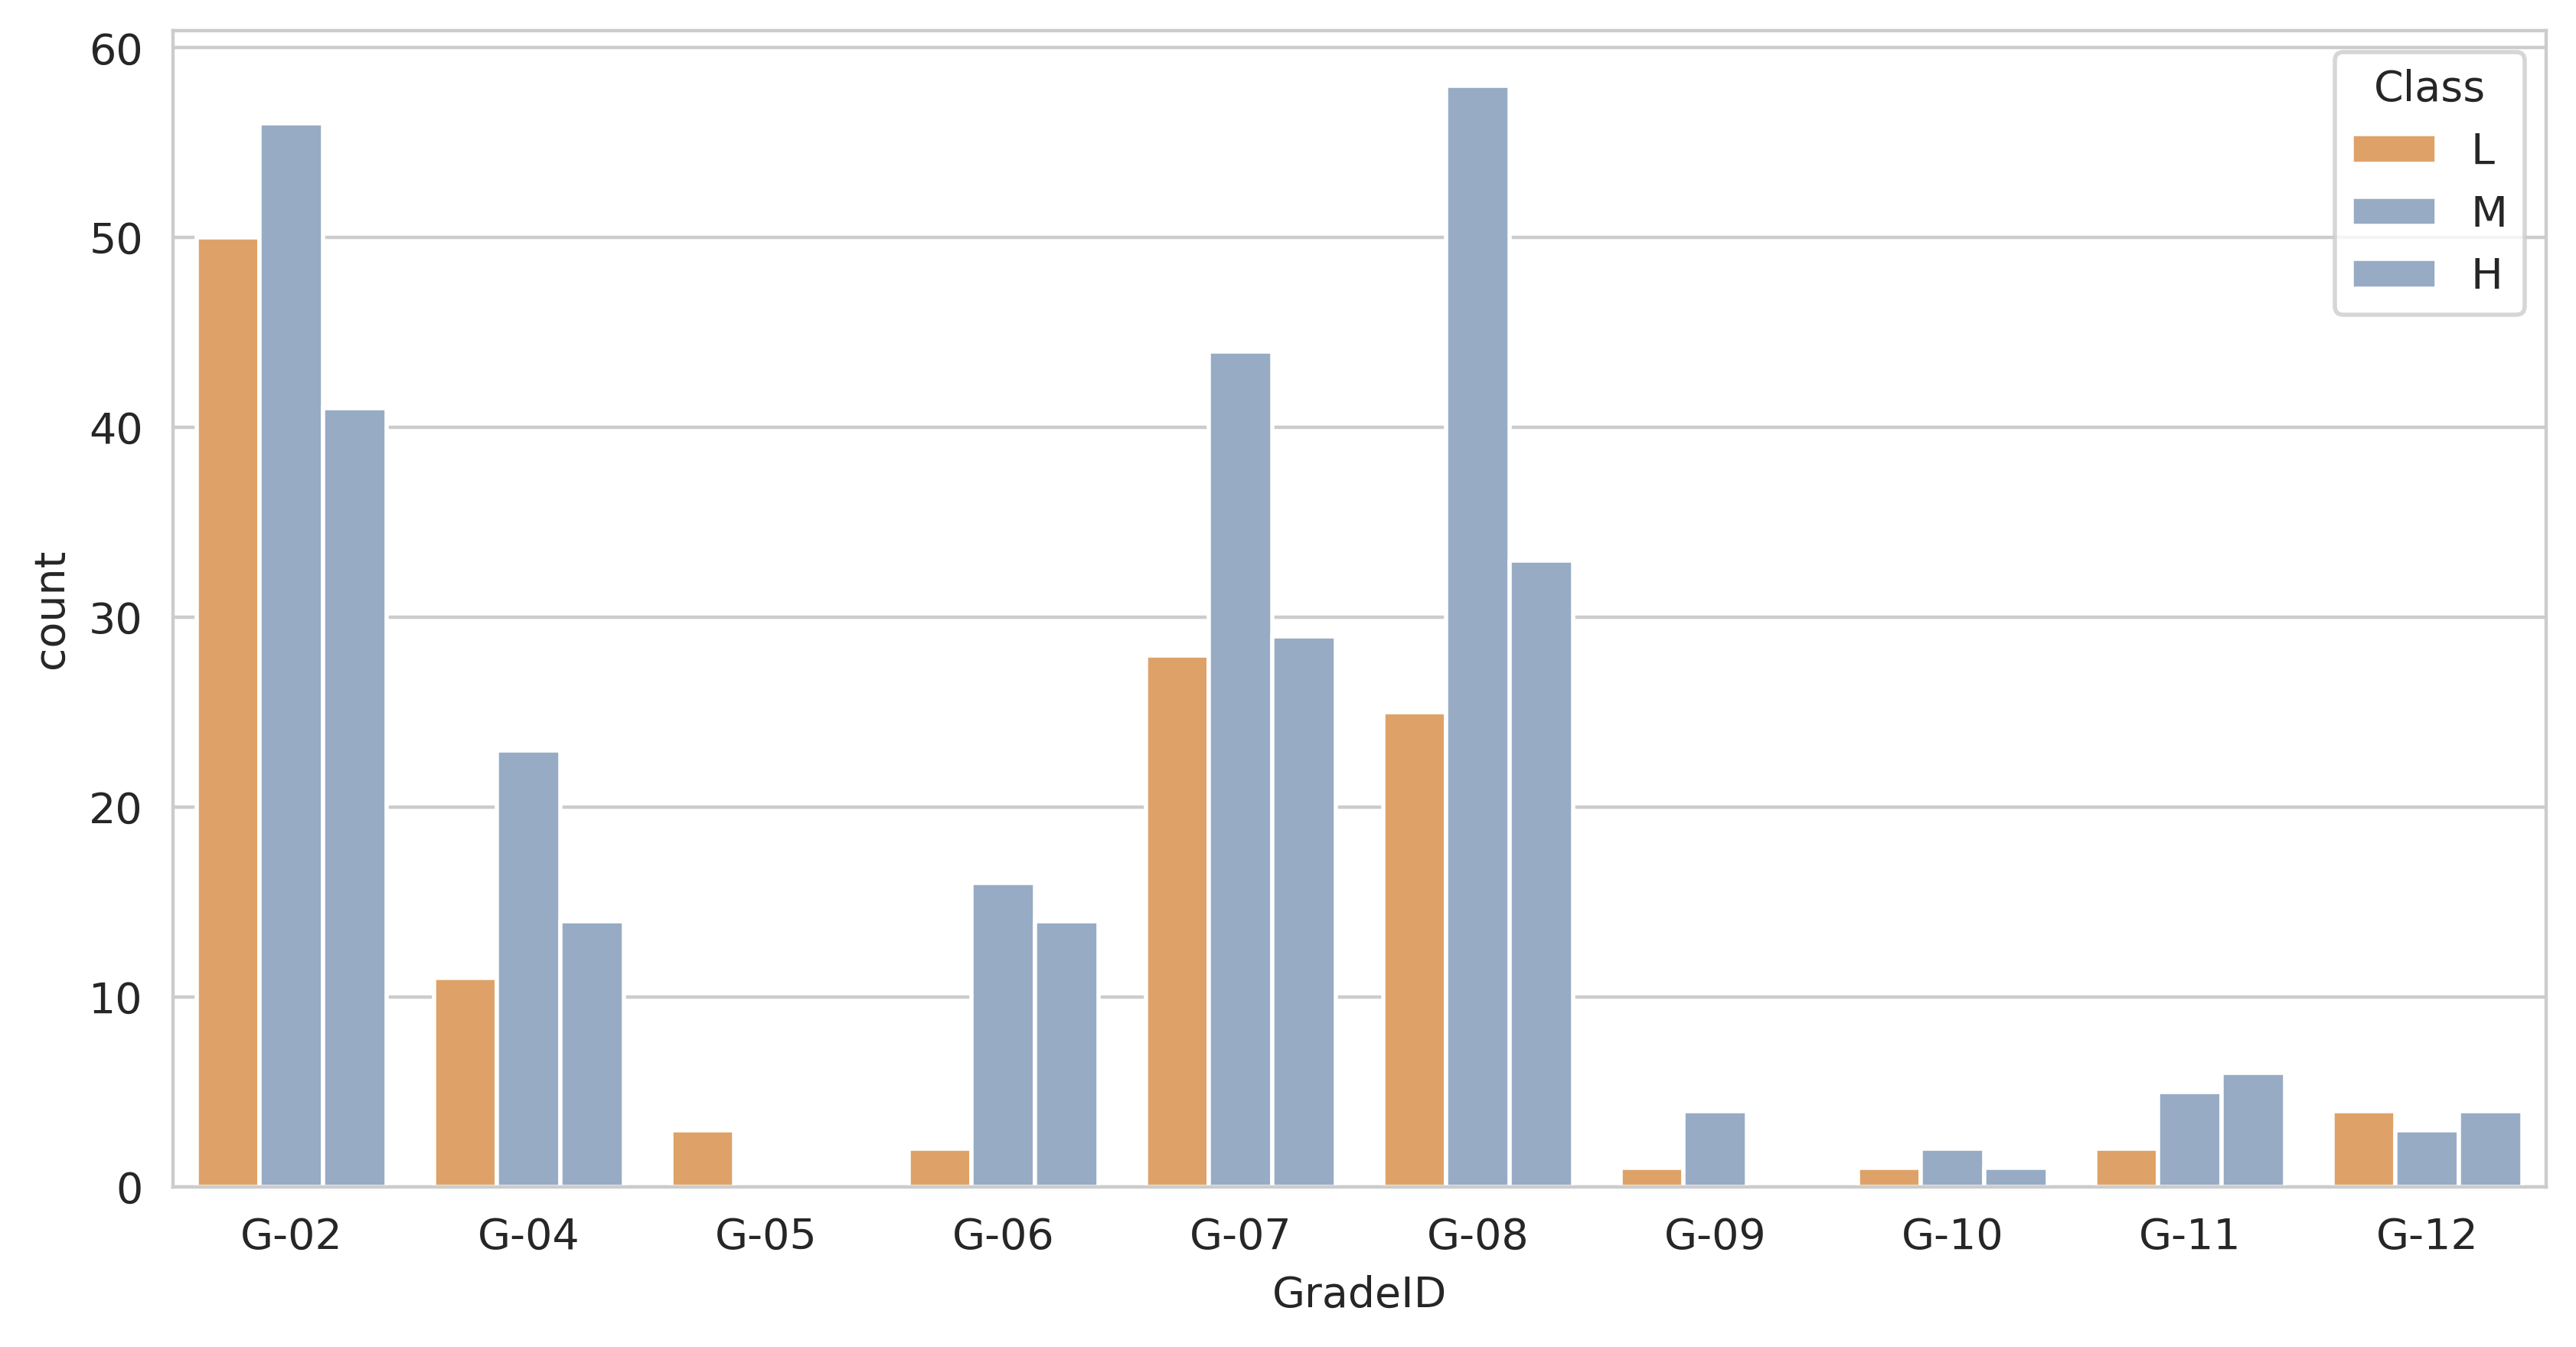

In [21]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='GradeID', hue='Class', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'])
plt.show()

## Discussion

In [22]:
df['Class_Num']=np.where(df['Class']=='L',0,1)
df['Class_Num'].value_counts()

1    353
0    127
Name: Class_Num, dtype: int64

<Figure size 200x500 with 0 Axes>

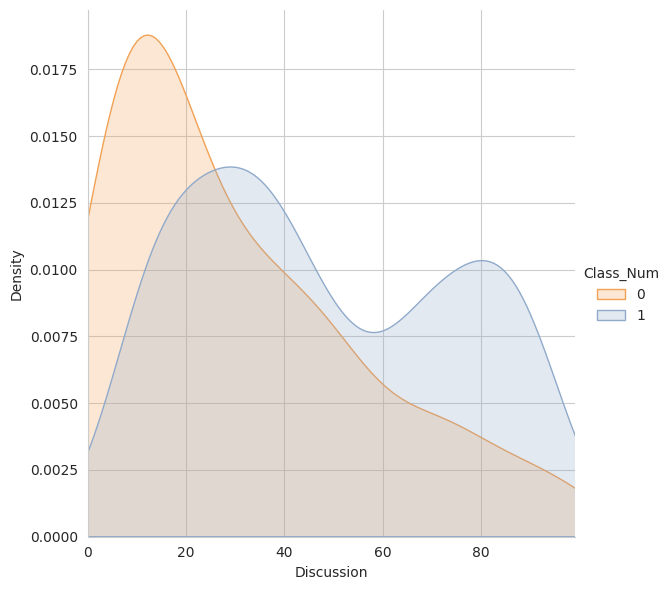

In [23]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
Facetgrid.add_legend()

## AnnouncementsView

<Figure size 200x500 with 0 Axes>

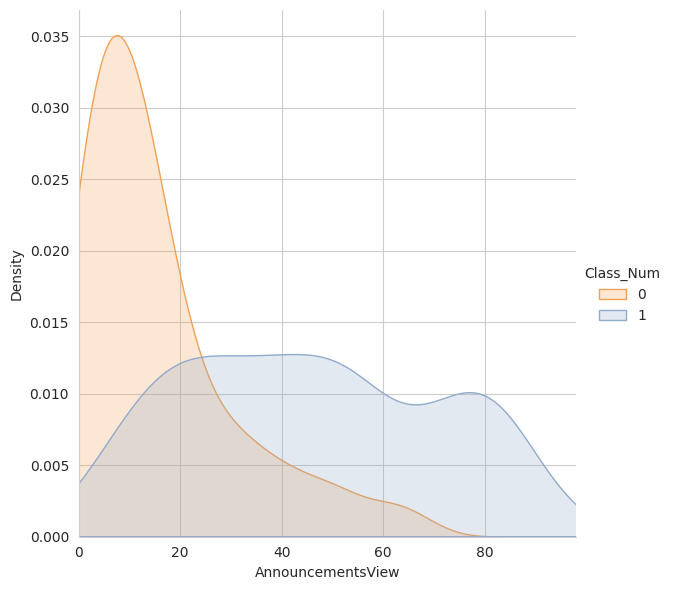

In [24]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'AnnouncementsView',shade=True)
Facetgrid.set(xlim=(0,df['AnnouncementsView'].max()))
Facetgrid.add_legend()

## VisITedResources

<Figure size 200x500 with 0 Axes>

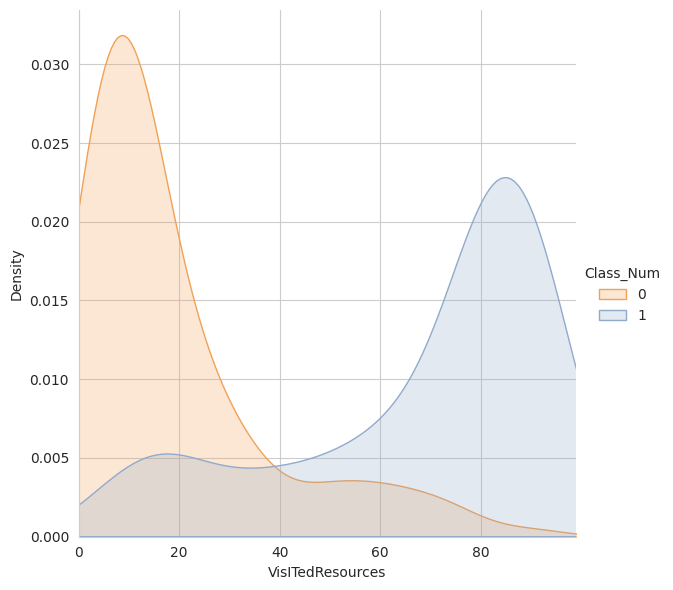

In [25]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
Facetgrid.add_legend()

## Raised Hand

<Figure size 200x500 with 0 Axes>

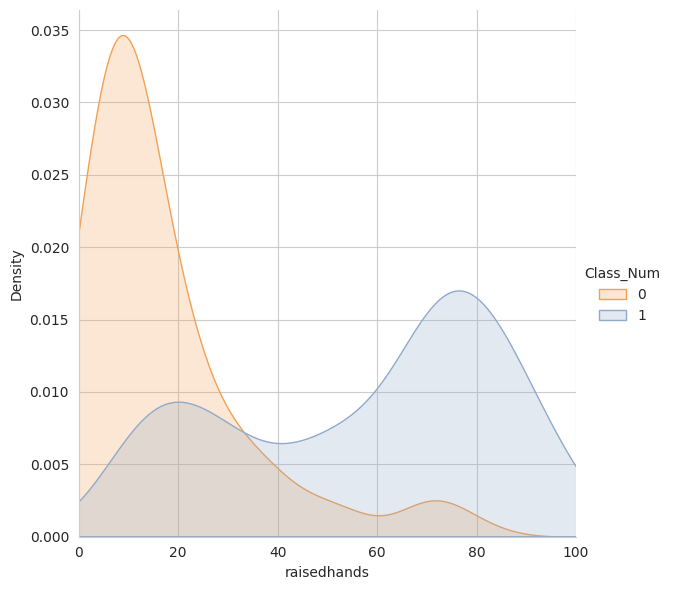

In [26]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()

From above 4 visualisation it is clear that students who belong to H and M are active students who are involved in discussion, check announement,  visit course content and raises hand.

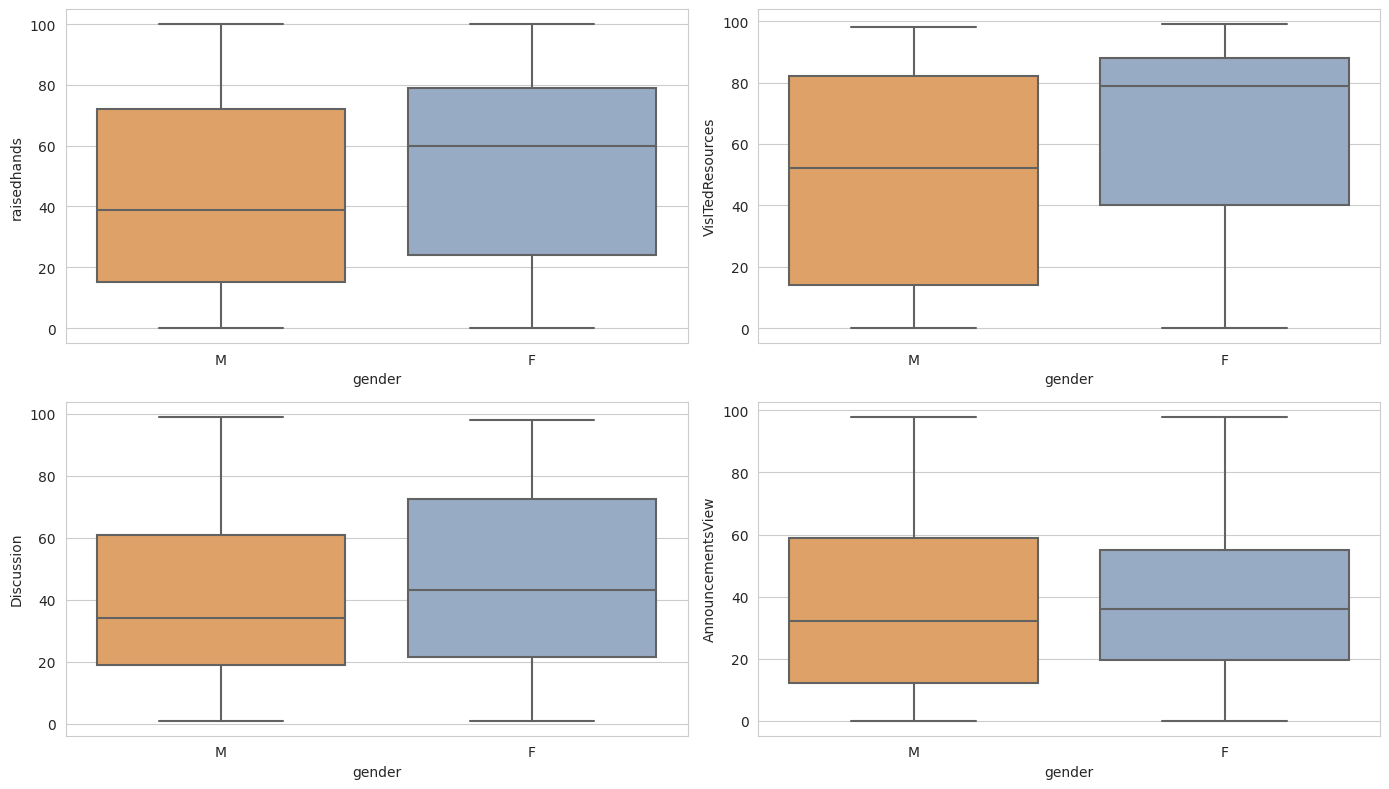

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(14,8))
sns.boxplot(x='gender', y='raisedhands', data=df, ax=ax[0,0])
sns.boxplot(x='gender', y='VisITedResources', data=df, ax=ax[0,1])
sns.boxplot(x='gender', y='Discussion', data=df, ax=ax[1,0])
sns.boxplot(x='gender', y='AnnouncementsView', data=df, ax=ax[1,1])
plt.tight_layout();

Female students are generally more active in the classroom activities as compared to fellow male students. That is female students performance are better than male students performance, which in line with our observation.

## Topic Of Education

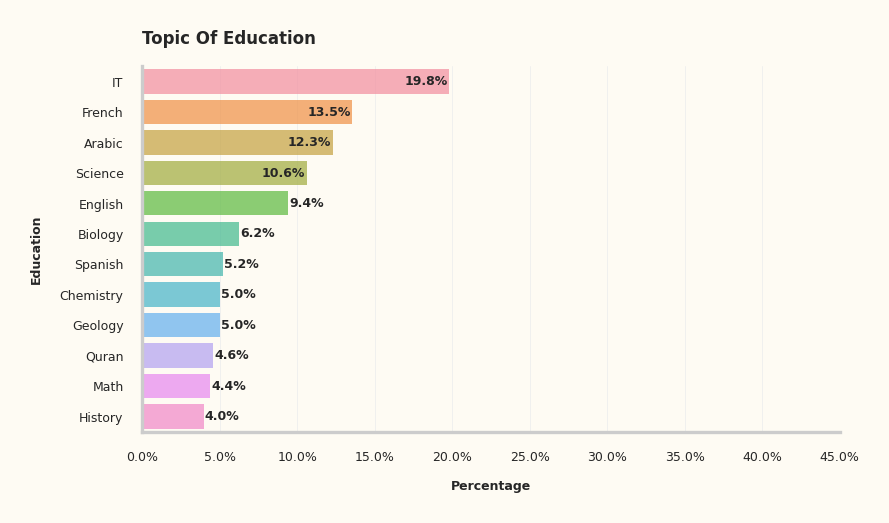

In [28]:
temp = pd.DataFrame(df.groupby('Topic', dropna=False).size()).reset_index()
temp.columns = ['education', 'amount']
temp = temp.query("amount>1")
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(7)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 45))
ax0.set(ylim=(0, 7))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['education'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Education",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0_sns.get_xlim()
y0, y1 = ax0_sns.get_ylim()
ax0_sns.text(x0, y1-1.2, 'Topic Of Education', fontsize=4, ha='left', va='top', weight='bold')


# data labe
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<4:
        x1 = -1.5
    else:
        x1 = 1.2
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=3, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

Majority of topic select is IT. Interestingly, next popular topics are two languages - French and Arabic.

Another interesting point might be to see whether there is any influence coming from the background of a student on topic selection.

In [29]:
topic_order = df['Topic'].value_counts().index
unique_topic = df['Topic'].unique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

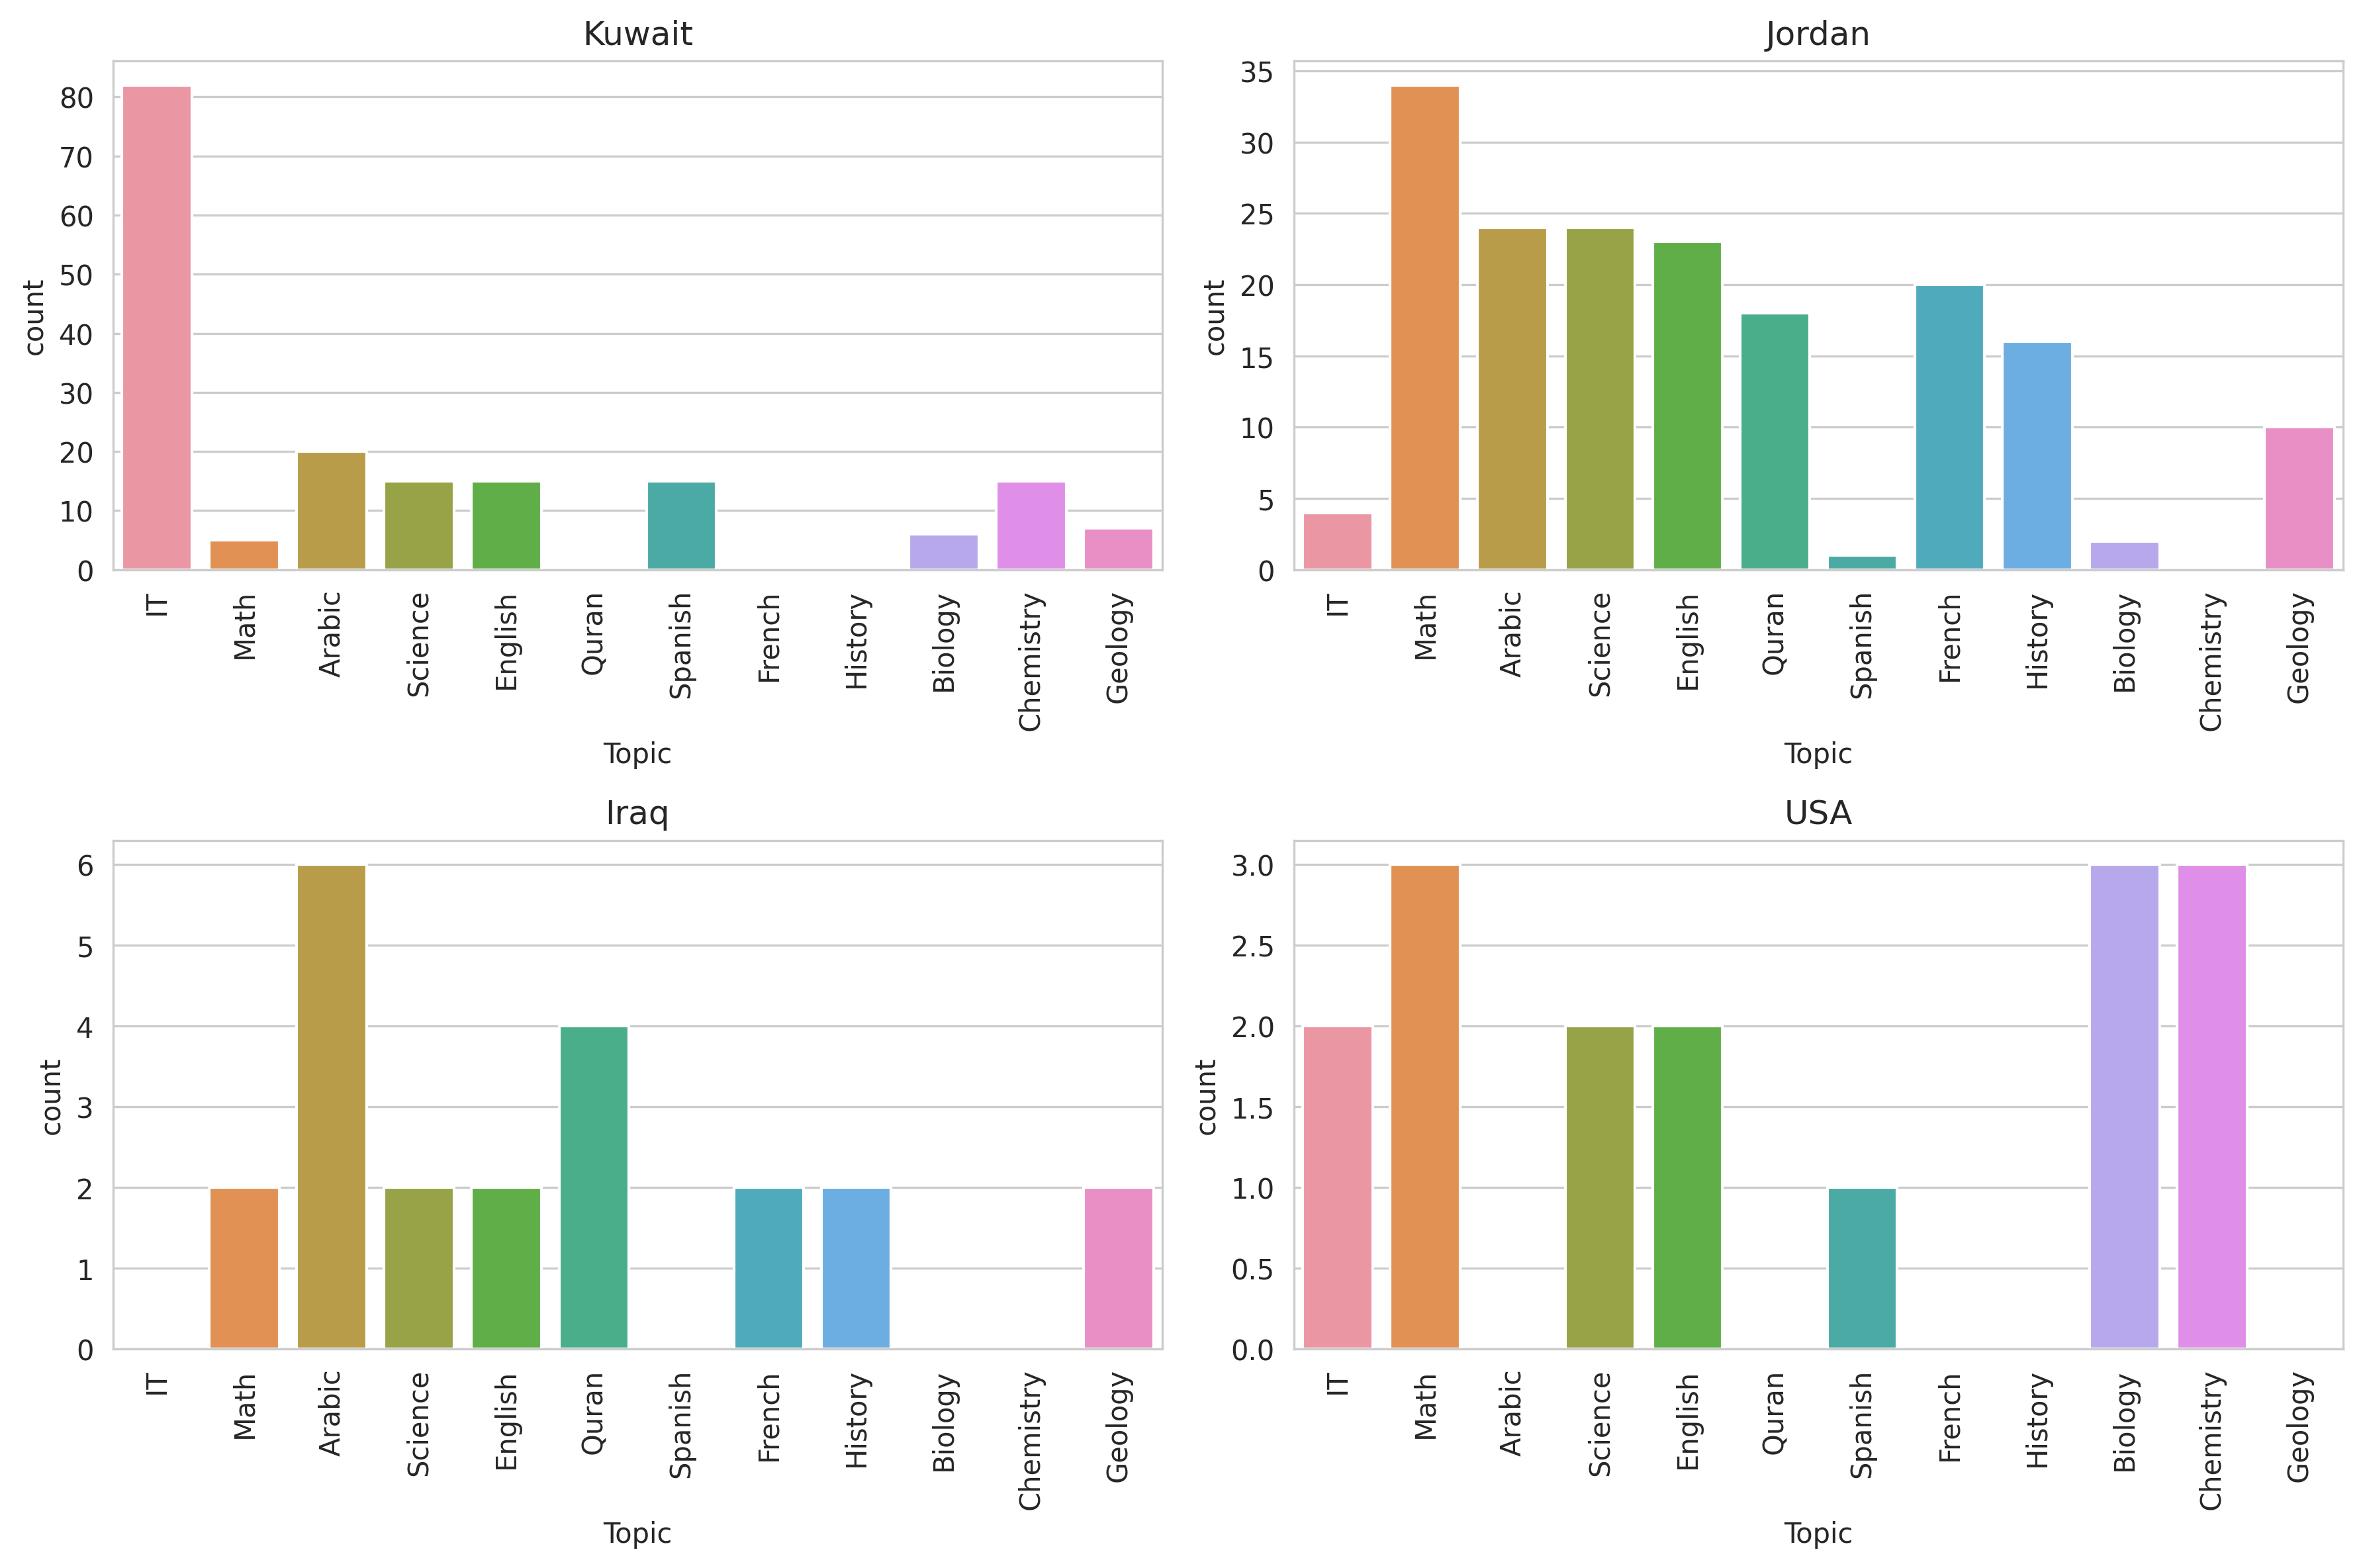

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(df.query('PlaceofBirth=="KuwaIT"')['Topic'], ax=ax[0,0],order=topic_order)
sns.countplot(df.query('PlaceofBirth=="Jordan"')['Topic'], ax=ax[0,1], order=topic_order)
sns.countplot(df.query('PlaceofBirth=="Iraq"')['Topic'], ax=ax[1,0], order=topic_order)
sns.countplot(df.query('PlaceofBirth=="USA"')['Topic'], ax=ax[1,1], order=topic_order)
ax[0,0].set_xticklabels(labels=unique_topic, rotation=90)
ax[0,1].set_xticklabels(labels=unique_topic, rotation=90)
ax[1,0].set_xticklabels(labels=unique_topic, rotation=90)
ax[1,1].set_xticklabels(labels=unique_topic, rotation=90)
ax[0,0].set_title('Kuwait')
ax[0,1].set_title('Jordan')
ax[1,0].set_title('Iraq')
ax[1,1].set_title('USA')
plt.tight_layout();

IT has the highest demand in Kuwait (also highest among the four countries shown above).
Math is the most popular topic in Jordan.
No student from Iraq has taken IT.
There is a comparable demand of math, biology and chemistry in USA.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

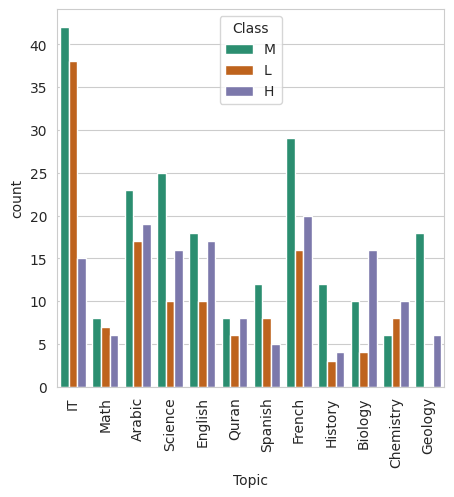

In [31]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

g=sns.countplot(x="Topic", data=df,hue="Class", palette="Dark2");
plt.xticks(rotation=90)

IT have majority of high grade and Medium grade student as well as low grade student.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

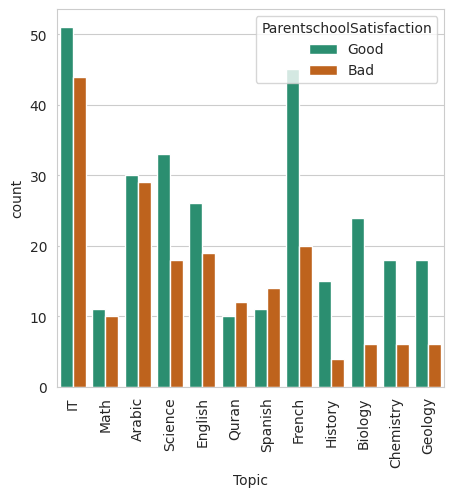

In [32]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

g=sns.countplot(x="Topic", data=df,hue="ParentschoolSatisfaction", palette="Dark2");
plt.xticks(rotation=90)

Most popular course IT has received almost comparable number of good and bad reviews from parents.
Courses like History, Biology, Chemistry and Geology are having more statisfaction from parents.

## Clubbing M & H together make visualisation more clear for Class distribution based on topic

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

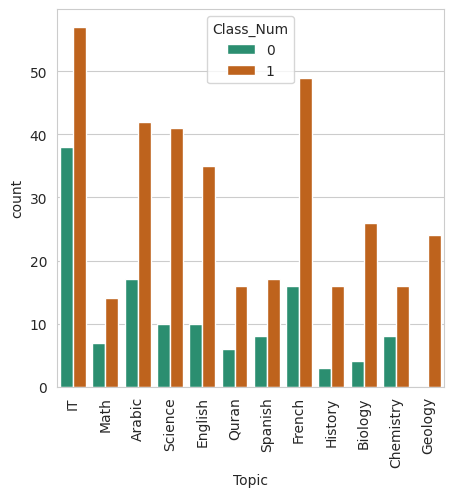

In [33]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

g=sns.countplot(x="Topic", data=df,hue="Class_Num", palette="Dark2");
plt.xticks(rotation=90)

In [34]:
df.drop('Class_Num',axis=1,inplace=True)

In [35]:
df.groupby('Topic').median().style.background_gradient(cmap='YlGn_r')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.000000,65.000000,41.000000,38.000000
Biology,78.500000,88.500000,54.000000,47.000000
Chemistry,79.000000,84.500000,47.000000,30.500000
English,55.000000,50.000000,33.000000,36.000000
French,35.000000,80.000000,23.000000,21.000000
Geology,80.000000,82.000000,68.500000,60.500000
History,69.000000,84.000000,72.000000,65.000000
IT,20.000000,25.000000,10.000000,40.000000
Math,28.000000,15.000000,19.000000,40.000000


Geology and History students are more active students who   are involved in discussion, check announement,  visit course content and raises hand.

IT and Maths students are comparitively less active students.

# Encoding Categorical Variable

In [36]:
X = df.drop(['Class'],axis = 1)
y = df['Class']

For enoding categorical data, dummy variable is to be created for each discrete categorical variable in each column which can be done by using pandas.get_dummies() which will return dummy-coded data.

For a particular feature we drop one dummy variable no relevant information will be lost as other dummy variables can explain dropped feature fully. So if there are n dummy variables, n-1 dummy variables will be able to predict the value of the n-th dummy variable. If we keep all the n variable it will also create issue known multicollinearity.

In pandas.get_dummies(), by using parameter drop_first = True, it will drop first dummy variable, thus it will give n-1 dummies out of n categorical levels by removing the first level.

In [38]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0


# Model Creation

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Feature Scaling** is scaling all your features to make sure they all take values on the same scale. It prevents one feature to dominate over the other. Feature Scaling is done after we split the dataset into the training set and test set and it is applied to the training set.

For feature scaling, we use the fit_transform() method for the training set and the transform() method for the test set.

**fit_transform()**: - It is applied only for training set. It contain two methods fit() and transform(). Fit() will do all the mathematical calculation and will get the mean and standard deviation of the data. So it is only done to training set, as we donot want test data values to be known by the model. As we consider test data as real data or live data. transform() method will apply the calculated values to the dataset or it transforms the data to fit the model.

**transform()** :- The transform() method applied to test set and test data are transformed or scaled using the model parameters that were learned on applying the fit method to the training dataset.

Robust Scaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).

In [40]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [54]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=200, random_state=52)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for: Logistic Regression

[[19  0 12]
 [ 0 40  5]
 [ 8  9 51]]
              precision    recall  f1-score   support

           H       0.70      0.61      0.66        31
           L       0.82      0.89      0.85        45
           M       0.75      0.75      0.75        68

    accuracy                           0.76       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.76      0.76      0.76       144

accuracy is 0.7638888888888888



Results for: Decision Tree

[[17  0 14]
 [ 0 32 13]
 [10 14 44]]
              precision    recall  f1-score   support

           H       0.63      0.55      0.59        31
           L       0.70      0.71      0.70        45
           M       0.62      0.65      0.63        68

    accuracy                           0.65       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.65      0.65      0.64       144

accuracy is 0.6458333333333334



Results for: Random Forest

[[22  

Among Three, Random Forest Classifier  performed better.

 
Can check if RFC performs with 
* Increase in number of estimators
* Minimum number of leaf required

# Validation of Random Forest Classifier

## With number of Estimators



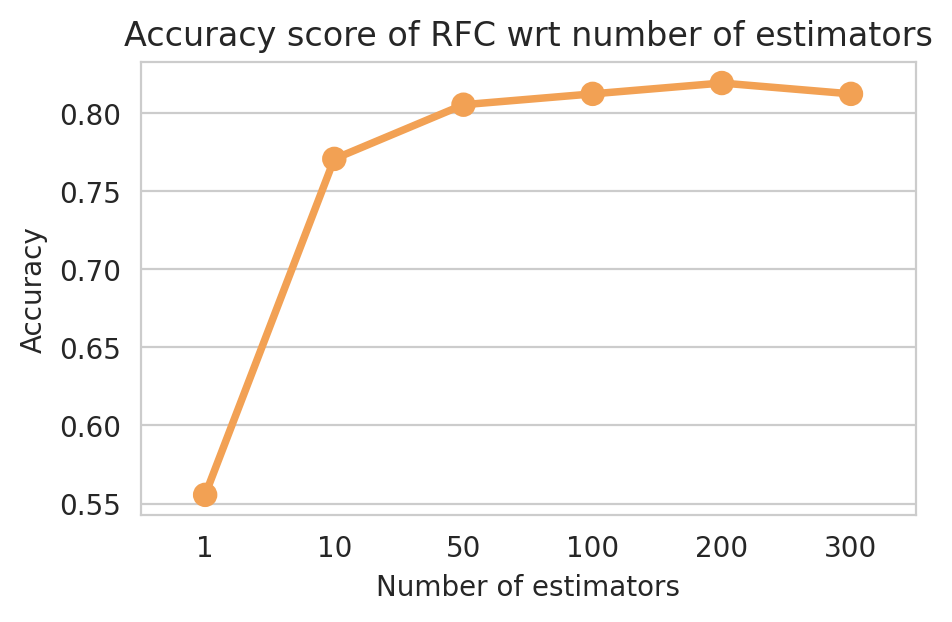

In [53]:
plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(5,3))

score = []
est = []
estimators = [1, 10, 50, 100, 200, 300]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC wrt number of estimators')
plt.show()

**Best number of estimators is 400**

## With number of Leaf

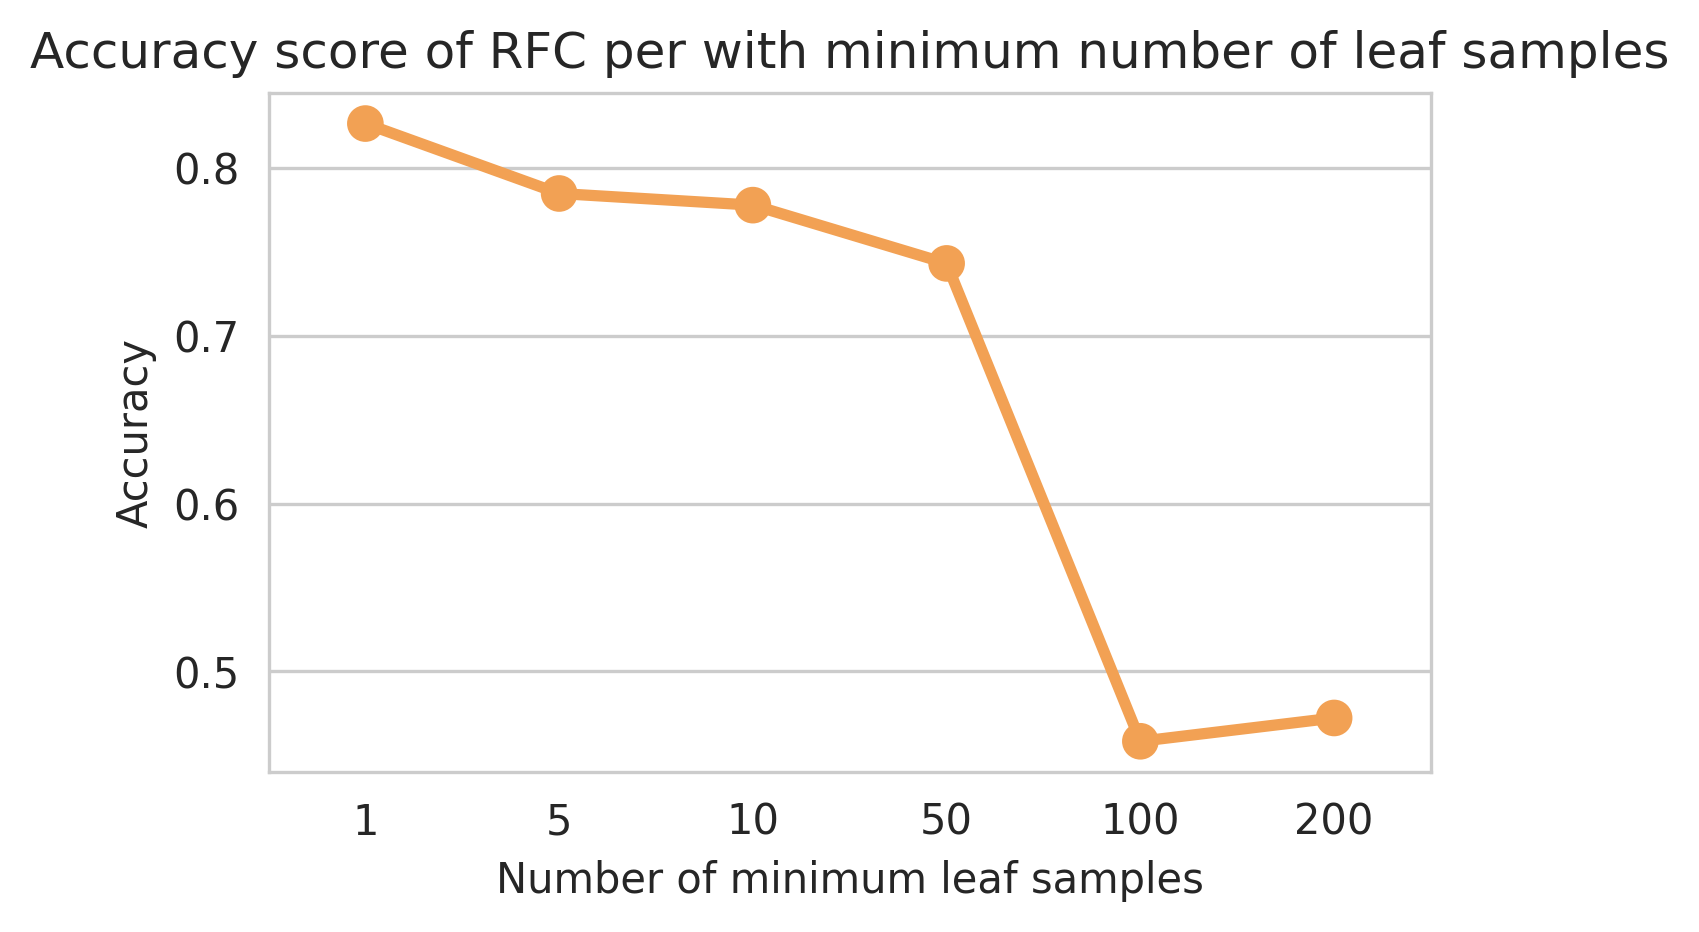

In [43]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5,3))
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=400, random_state=52, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per with minimum number of leaf samples')
plt.show()

**With Minimum leaf as 1 is the best.**

## Feature Importance of Random Forest

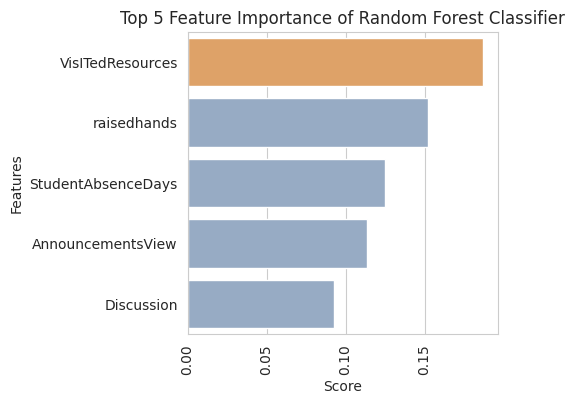

In [44]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(4,4))

rfc = RandomForestClassifier(n_estimators=400, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)

dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
df1 = df.head()
plot = sns.barplot(x='score', y='features', data=df1, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Top 5 Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

**Visited resources is the most important feature in Random Forest Classifier**

# XGBoost Classifier

In [45]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
pred = xgb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print("accuracy is "+ str(accuracy_score(y_test, pred)))   

[[21  0 10]
 [ 0 40  5]
 [ 8  9 51]]
              precision    recall  f1-score   support

           H       0.72      0.68      0.70        31
           L       0.82      0.89      0.85        45
           M       0.77      0.75      0.76        68

    accuracy                           0.78       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.78      0.78      0.78       144

accuracy is 0.7777777777777778


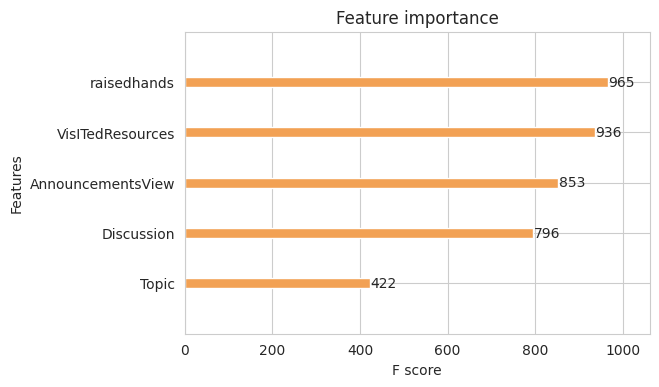

In [46]:
plot_importance(xgb, max_num_features = 5)
plt.rcParams['figure.figsize']=(4,4)
plt.show()

## Hyper parameters tuning and using a grid search

In [52]:
d_values = []
l_values = []
n_values = []
acc_values = []
depth = [2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17]
learning_Rate = [0.01, 0.1, 1]
n_estimators = [50, 100, 150, 200, 250,300,350,400]
for d in depth:
    for l in learning_Rate:
        for n in n_estimators:
            xgb = XGBClassifier(max_depth=d, learning_rate=l, n_estimators=n, seed=52)
            pred = xgb.fit(X_train, y_train).predict(X_test)
            acc = accuracy_score(y_test, pred)
            d_values.append(d)
            l_values.append(l)
            n_values.append(n)
            acc_values.append(acc)
            
dict = {'max_depth':d_values, 'learning_rate':l_values, 'n_estimators':n_values,
       'accuracy':acc_values}

output = pd.DataFrame.from_dict(data=dict)
print(output.sort_values(by='accuracy', ascending=False)) 

     max_depth  learning_rate  n_estimators  accuracy
34           3           0.10           150  0.819444
35           3           0.10           200  0.805556
17           2           1.00           100  0.805556
115          6           1.00           200  0.798611
116          6           1.00           250  0.798611
..         ...            ...           ...       ...
49           4           0.01           100  0.729167
24           3           0.01            50  0.722222
4            2           0.01           250  0.722222
73           5           0.01           100  0.722222
0            2           0.01            50  0.715278

[384 rows x 4 columns]


First 4 have best accuracy


In [50]:
xgb2 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=150, seed=34)
pred = xgb2.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))   

[[21  0 10]
 [ 0 41  4]
 [ 5  7 56]]
              precision    recall  f1-score   support

           H       0.81      0.68      0.74        31
           L       0.85      0.91      0.88        45
           M       0.80      0.82      0.81        68

    accuracy                           0.82       144
   macro avg       0.82      0.80      0.81       144
weighted avg       0.82      0.82      0.82       144

accuracy is 0.8194444444444444


## Feature Importance

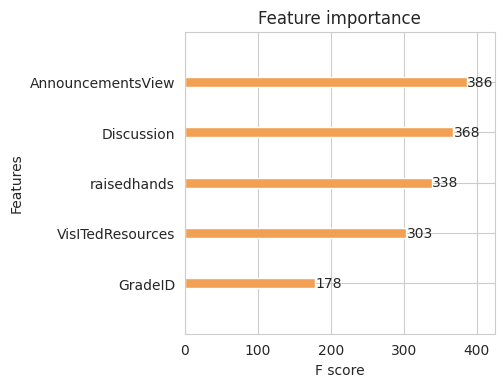

In [51]:
plot_importance(xgb2, max_num_features = 5)
plt.rcParams['figure.figsize']=(4,4)
plt.show()

Best accuracy feature is announcement view.

# Conculsion

* 29.6% of student belongs to High level.
44% of student belongs to Mid Level and 26.5% belong to low level.


* 63.5% of total students are male student and 36.5% of students are female student.

* Only 5% of female students belong to low level. So female students performance is better than male students.

* Female students are generally more active in the classroom activities as compared to fellow male students. That is female students performance are better than male students performance, which in line with our observation.

* Also it is clear that students who belong to H and M are active students who are involved in discussion, check announement, visit course content and raises hand.

* Only 4.8% students who have realtion with mom belongs to Lower grade.

* Those students whose parents are having statisfaction with school are having good grade.

* Majority of students whose Parents are answering survey belongs to M or H class.

* Majority of students who are absent more than 7 days are having low grade.

* 30.6% of student belong to grade level 02.


* 74.2% of Students enrollments are from Kuwait and Jordan. Although most of the students come from middle east countries, interestingly there are some enrollments from the united states.

* Majority of topic select is IT and next demanding topics are two languages - French and Arabic.

* IT has the highest demand in Kuwait where as Math is the having highest demand in Jordan. No student from Iraq has taken IT. There is a comparable demand of math, biology and chemistry in USA.

* Most demanding course IT has received almost comparable number of good and bad reviews from parents. Whereas courses like History, Biology, Chemistry and Geology are having more statisfaction from parents.

* XG Boost and Random Forest are best model for predicting performance of Student.

* XG Boost has best accuracy of 81.944% and its most important feature is announcement view. It performs best when it has max_depth=3, learning_rate=0.1, n_number of estimators=150.

* Random Forest performs well with accuracy if 81.944%  when number of estimators are 200. Visited resources is the most important feature in Random Forest Classifier.





